In [63]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

,data1,data2
0,123.144,123.08
1,123.138,123.05
2,123.106,123.01
3,123.098,122.97
4,123.068,122.94


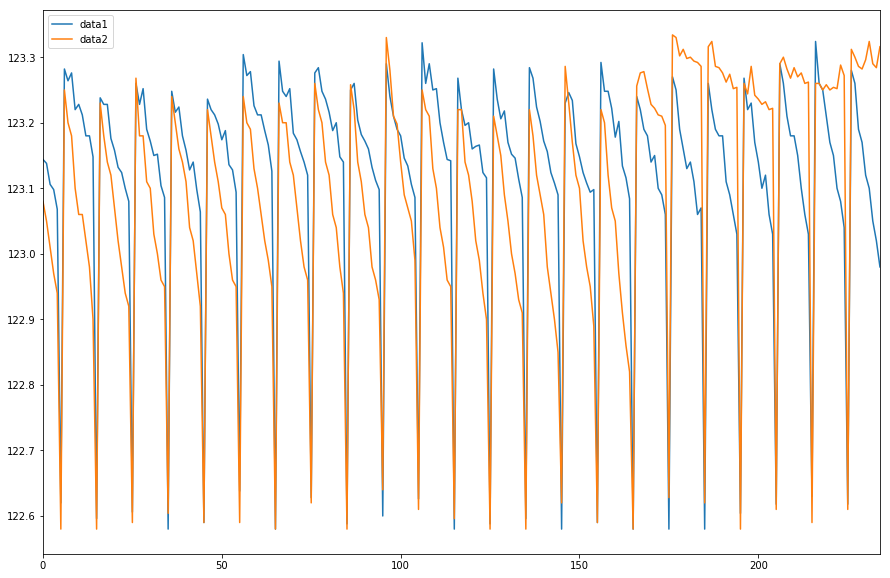

In [107]:
import pandas as pd
import numpy as np
import math as m
import matplotlib
import matplotlib.pyplot as plt

file_name = "2018-1-23_4.delays_gps_reference"

# DataAnalyser2.process_gologic_csv(file_name)
df = pd.read_csv("old_data/" + file_name + ".csv", names=["data1", "data2"], index_col=None)

%matplotlib inline

plot_range = df.size

df.iloc[:plot_range].plot(figsize=(15,10))
df.head()

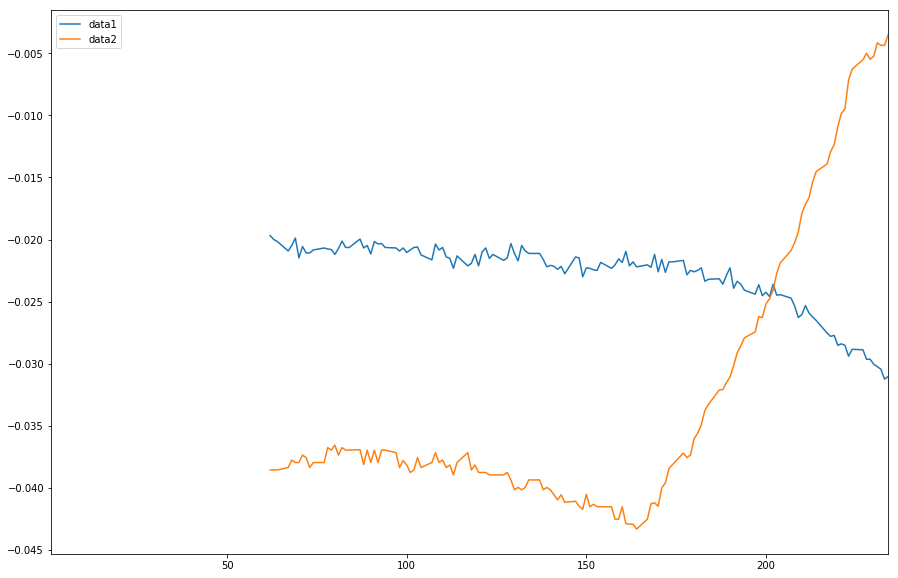

In [111]:
drift = df.diff()

threshold = 0.2
drift = drift[drift > -threshold]
drift = drift[drift < threshold]

drift.dropna(inplace=True)
drift = drift.rolling(50).mean()
# n=50
# drift = pd.Series.ewm(drift, span=n, min_periods=n-1, adjust=True).mean()

drift.iloc[:plot_range].plot(figsize=(15,10))
# plt.ylim([-0.1, 0.025])